In [1]:
import torch
import numpy as np

In [13]:
# База для формирования тензоров (список или массив)
a = [1, 2, 3]
b = np.array([4, 5, 6])

In [14]:
# Преобразование в тензоры
t_a = torch.tensor(a)
t_b = torch.tensor(b)
# альтернатива 
t_b_alt = torch.from_numpy(b)

print(t_a)
print(t_b)
print(t_b_alt)

tensor([1, 2, 3])
tensor([4, 5, 6])
tensor([4, 5, 6])


In [15]:
# Можео создавать как массивы
t_ones = torch.ones((2, 3), dtype=torch.int8)
print(t_ones)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int8)


In [17]:
# Можно создавать случайные тензоры
rand_tens = torch.rand((2, 3), dtype=torch.float32)
print(rand_tens)

tensor([[0.7260, 0.4078, 0.2915],
        [0.7020, 0.8047, 0.5096]])


In [19]:
# Изменение типов данных
t_ones_float = t_ones.to(torch.float32)
print(t_ones_float, t_ones_float.dtype)

tensor([[1., 1., 1.],
        [1., 1., 1.]]) torch.float32


---

### Манипуляции с тензорами

In [24]:
# Транспонирование тензоров
t = torch.rand((3, 5))
t

tensor([[0.9912, 0.0095, 0.1173, 0.5188, 0.0358],
        [0.2192, 0.4035, 0.1138, 0.1299, 0.9833],
        [0.7230, 0.1129, 0.4995, 0.1907, 0.0482]])

In [31]:
t_tr = torch.transpose(t, 0, 1)
t_tr

tensor([[0.9912, 0.2192, 0.7230],
        [0.0095, 0.4035, 0.1129],
        [0.1173, 0.1138, 0.4995],
        [0.5188, 0.1299, 0.1907],
        [0.0358, 0.9833, 0.0482]])

In [32]:
t.t()

tensor([[0.9912, 0.2192, 0.7230],
        [0.0095, 0.4035, 0.1129],
        [0.1173, 0.1138, 0.4995],
        [0.5188, 0.1299, 0.1907],
        [0.0358, 0.9833, 0.0482]])

---

In [37]:
# Изменение формы тензоров
t = torch.zeros(50)
t

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [42]:
t.reshape(25,2)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

---

In [44]:
# Удалиние измерений
t = torch.zeros(1, 2, 1, 4, 1)
t

tensor([[[[[0.],
           [0.],
           [0.],
           [0.]]],


         [[[0.],
           [0.],
           [0.],
           [0.]]]]])

In [58]:
t_sqz = torch.squeeze(t, 2)
t_sqz

tensor([[[[0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.]]]])

In [59]:
print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


---
---
### Математические операции

In [84]:
torch.manual_seed(1)  # фиксируем генератор сч
t_1 = torch.rand(5, 2) * 2 - 1  # равномерное распределение
t_2 = torch.normal(mean=0, std=1, size=(5, 2))  # нормальное распределение
print(t_2, "\n", t_1)

tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]]) 
 tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])


In [85]:
# Поэлементное умножение тензоров
t_3 = torch.multiply(t_1, t_2)
t_3

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [90]:
# Вычисление среднего, суммы, ско
display(torch.mean(t_1, axis=0), torch.sum(t_1, axis=1), torch.std(t_1))

tensor([-0.1373,  0.2028])

tensor([ 0.0739,  0.2755, -0.3417,  0.3030,  0.0166])

tensor(0.5043)

In [98]:
# матричное произведение
t_5 = torch.matmul(t_1, torch.transpose(t_2, 0, 1))
display(t_5, t_5.shape)

# матричное произведение
t_6 = torch.matmul(torch.transpose(t_1, 0, 1), t_2)
display(t_6, t_6.shape)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])

torch.Size([5, 5])

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])

torch.Size([2, 2])

In [99]:
# Вычисление нормы
t_7 = torch.linalg.norm(t_5, ord=2, dim=1)
display(t_7, t_7.shape)


tensor([1.2902, 1.0263, 2.0719, 1.1096, 0.3531])

torch.Size([5])

---
---
### Стекирование и нарезание тензоров

#### Слайс

In [100]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


In [104]:
t_splits = torch.chunk(t, 3, dim=0)
t_splits

(tensor([0.7576, 0.2793]), tensor([0.4031, 0.7347]), tensor([0.0293, 0.7999]))

In [105]:
[item.numpy() for item in t_splits]  # выводим каждый элемент в новый массив

[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

или

In [107]:
torch.manual_seed(1)
t_2 = torch.rand(5)
print(t_2)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


In [112]:
t_splits = torch.split(t_2, split_size_or_sections=[2, 1, 2])
print(t_splits)

(tensor([0.7576, 0.2793]), tensor([0.4031]), tensor([0.7347, 0.0293]))


In [113]:
[item.numpy() for item in t_splits]

[array([0.758, 0.279], dtype=float32),
 array([0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

#### Стек

In [117]:
A = torch.ones(3)
B = torch.zeros(3)

display(A, B)

# Склейка тензоров
t_cat = torch.cat((A, B), dim=0)
display(t_cat, t_cat.shape)

# Стекирование тензоров
t_stack = torch.stack((A, B), dim=1)
display(t_stack, t_stack.shape)

tensor([1., 1., 1.])

tensor([0., 0., 0.])

tensor([1., 1., 1., 0., 0., 0.])

torch.Size([6])

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])

torch.Size([3, 2])

---
---
### Создание объектов Dataloader

In [118]:
from torch.utils.data import DataLoader

In [126]:
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

# итерируем по объекту data_loader
for item in data_loader:
    print(item)


tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [128]:
# указываем размер пакета
data_loader = DataLoader(t, batch_size=4, drop_last=False)
for item in data_loader:
    print(item)
    


tensor([0., 1., 2., 3.])
tensor([4., 5.])


#### Создание объектов DataSets

In [129]:
from torch.utils.data import Dataset

In [135]:
# объединение тензоров в один блок датасет
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

display(t_x, t_y)


tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247]])

tensor([0, 1, 2, 3])

In [139]:
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__():
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    
joint_dataset_complex = JointDataset(t_x, t_y)

for example in joint_dataset_complex:
    print(example[0], example[1])

tensor([0.7576, 0.2793, 0.4031]) tensor(0)
tensor([0.7347, 0.0293, 0.7999]) tensor(1)
tensor([0.3971, 0.7544, 0.5695]) tensor(2)
tensor([0.4388, 0.6387, 0.5247]) tensor(3)


In [146]:
from torch.utils.data import TensorDataset

joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print(example[0], example[1])
    

tensor([0.7576, 0.2793, 0.4031]) tensor(0)
tensor([0.7347, 0.0293, 0.7999]) tensor(1)
tensor([0.3971, 0.7544, 0.5695]) tensor(2)
tensor([0.4388, 0.6387, 0.5247]) tensor(3)


---
---
### Перемешивание, группировка, повторение

In [147]:
torch.manual_seed(1)

data_loader = DataLoader(joint_dataset, batch_size=2, drop_last=False, shuffle=True)

for i, batch in enumerate(data_loader):
    print(f"batch {i}, x: {batch[0]}, y: {batch[1]}")

batch 0, x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]), y: tensor([2, 0])
batch 1, x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]), y: tensor([1, 3])


In [151]:
# пример на отработке эпох
for epoch in range(2):
    print(f"epoch {epoch+1}")
    for i, batch in enumerate(data_loader):
        print(f"batch {i}, x: {batch[0]}, y: {batch[1]}")   

epoch 1
batch 0, x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]), y: tensor([0, 2])
batch 1, x: tensor([[0.4388, 0.6387, 0.5247],
        [0.7347, 0.0293, 0.7999]]), y: tensor([3, 1])
epoch 2
batch 0, x: tensor([[0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695]]), y: tensor([1, 2])
batch 1, x: tensor([[0.4388, 0.6387, 0.5247],
        [0.7576, 0.2793, 0.4031]]), y: tensor([3, 0])


---
---
### Создание датасета из локально расположенных данных

In [152]:
import pathlib

In [157]:
imdir_path = pathlib.Path("./data/cat_dogs/")
imdir_path

PosixPath('data/cat_dogs')

In [160]:
file_list = sorted([str(path) for path in imdir_path.glob("*.jpg")])

In [161]:
print(file_list)

['data/cat_dogs/cat-01.jpg', 'data/cat_dogs/cat-02.jpg', 'data/cat_dogs/cat-03.jpg', 'data/cat_dogs/dog-01.jpg', 'data/cat_dogs/dog-02.jpg', 'data/cat_dogs/dog-03.jpg']


In [162]:
import matplotlib.pyplot as plt
import os
from PIL import Image

Размеры изображения: (900, 1200, 3)
Размеры изображения: (900, 1200, 3)
Размеры изображения: (900, 742, 3)
Размеры изображения: (800, 1200, 3)
Размеры изображения: (800, 1200, 3)
Размеры изображения: (900, 1200, 3)


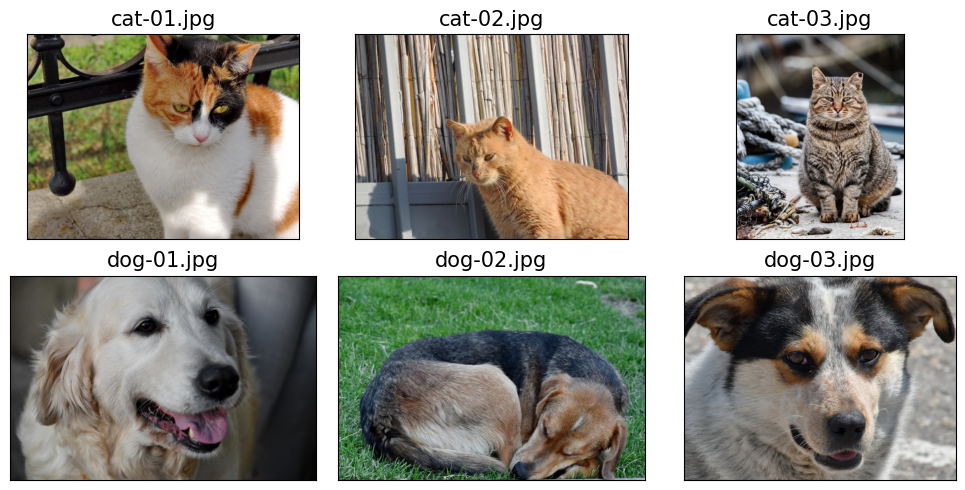

In [163]:
fig = plt.figure(figsize=(10, 5))

for i, file in enumerate(file_list):
    img = Image.open(file)
    print(f"Размеры изображения: {np.array(img).shape}")

    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [168]:
labels = [1 if "dog" in os.path.basename(file) else 0 for file in file_list]
labels

[0, 0, 0, 1, 1, 1]

In [169]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label
    
        

In [170]:
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

data/cat_dogs/cat-01.jpg 0
data/cat_dogs/cat-02.jpg 0
data/cat_dogs/cat-03.jpg 0
data/cat_dogs/dog-01.jpg 1
data/cat_dogs/dog-02.jpg 1
data/cat_dogs/dog-03.jpg 1
